# Network Evaluation

**Power Law Distribuition and Small World Network**

**Power law distribution** means that a few nodes in a network have a lot of connections while most nodes have only a few connections. 

**Small-world network** means that nodes are connected through a few highly connected nodes. Real-world networks often exhibit both of these properties.

# Degree Distribution

In [1]:
import networkx as nx

G1 = nx.Graph()
G1.add_edges_from([("A", "G"),
                   ("G", "I"),
                   ("A", "H"),
                   ("H", "G"),
                   ("G", "F"),
                   ("F", "I"),
                   ("A", "B"),
                   ("B", "C"),
                   ("C", "D"),
                   ("D", "F"),
                   ("C", "E")])

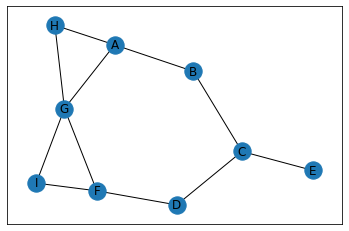

In [3]:
nx.draw_networkx(G1)

In [4]:
#find degrees
degrees = dict(G1.degree())
degrees

{'A': 3, 'G': 4, 'I': 2, 'H': 2, 'F': 3, 'B': 2, 'C': 3, 'D': 2, 'E': 1}

In [5]:
#Values of Degrees
degree_values = sorted(set(degrees.values()))
degree_values

[1, 2, 3, 4]

In [6]:
histogram = [list(degrees.values()).count(i)/float(nx.number_of_nodes(G1)) for i in degree_values]
histogram

[0.1111111111111111,
 0.4444444444444444,
 0.3333333333333333,
 0.1111111111111111]

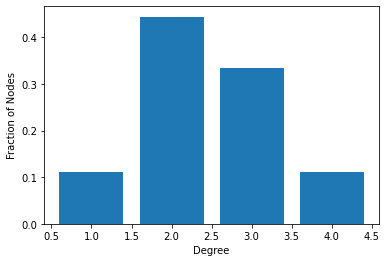

In [7]:
import matplotlib.pyplot as plt

plt.bar(degree_values, histogram)
plt.xlabel("Degree")
plt.ylabel("Fraction of Nodes")
plt.show()

# Direct Distribution

In [9]:
G2 = nx.DiGraph()

G2.add_edges_from([("B", "A"),
                   ("H", "A"),
                   ("G", "A"),
                   ("H", "G"),
                   ("G", "I"),
                   ("G", "F"),
                   ("F", "I"),
                   ("F", "D"),
                   ("D", "C"),
                   ("E", "C"),
                   ("C", "B")])

<Figure size 1440x720 with 0 Axes>

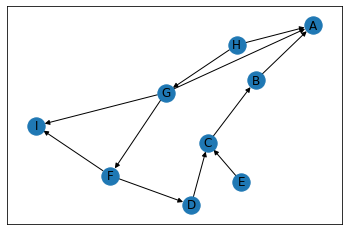

<Figure size 1440x720 with 0 Axes>

In [18]:
nx.draw_networkx(G2)
#plt.figure(figsize=(20,10))

In [22]:
#find degrees
in_degrees = dict(G2.in_degree())
in_degrees

{'B': 1, 'A': 3, 'H': 0, 'G': 1, 'I': 2, 'F': 1, 'D': 1, 'C': 2, 'E': 0}

In [25]:
in_degree_values = sorted(set(in_degrees.values()))
in_degree_values

[0, 1, 2, 3]

In [26]:
histogram = [list(in_degrees.values()).count(i)/float(nx.number_of_nodes(G2)) for i in in_degree_values]
histogram

[0.2222222222222222,
 0.4444444444444444,
 0.2222222222222222,
 0.1111111111111111]

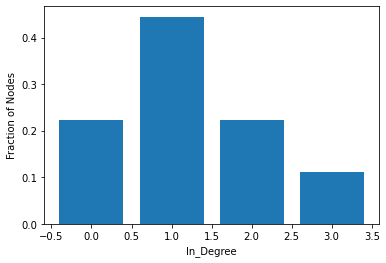

In [27]:
plt.bar(in_degree_values, histogram)
plt.xlabel("In_Degree")
plt.ylabel("Fraction of Nodes")
plt.show()

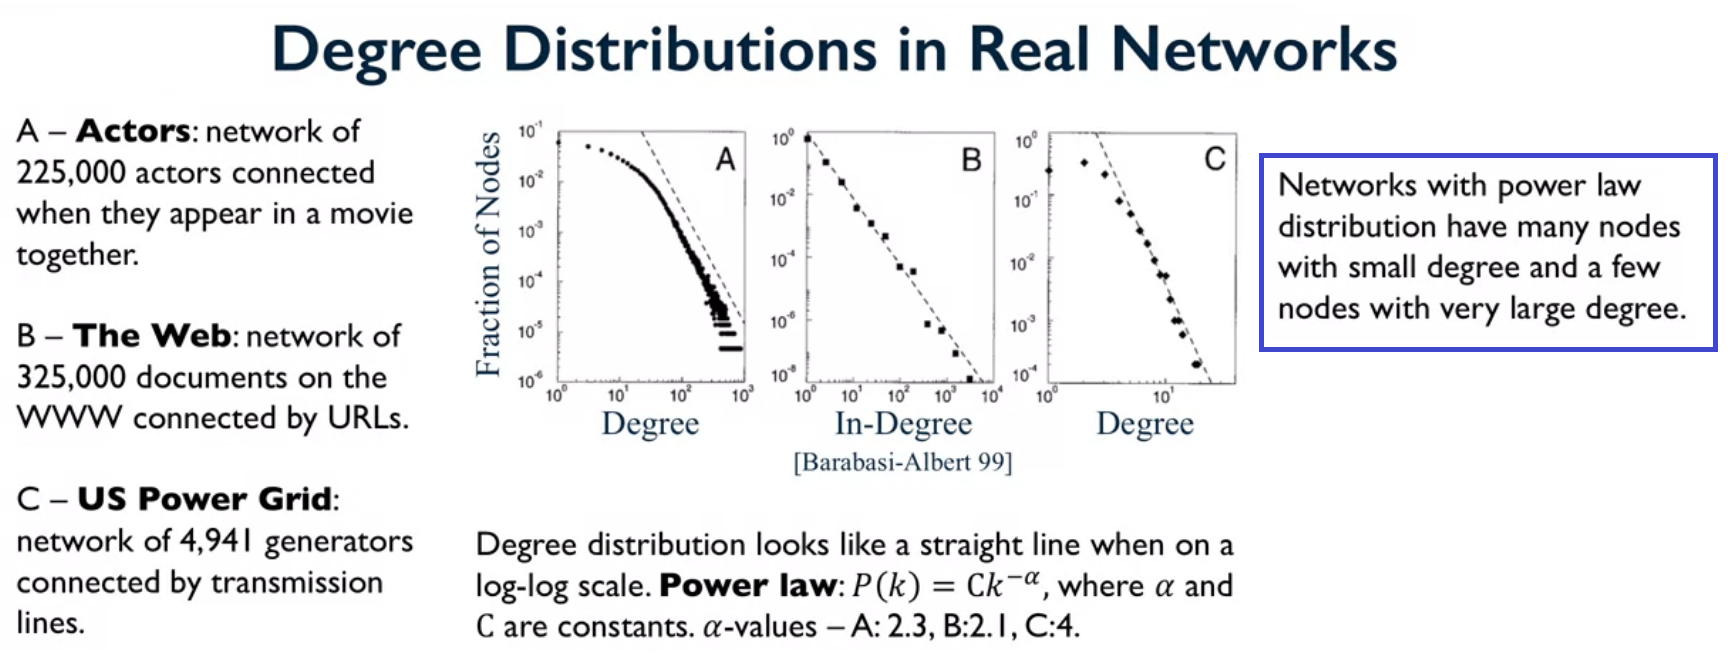

# Prefential Attachment in Networkx

In [24]:
import networkx as nx

import matplotlib.pyplot as plt

**`nx.barabasi_albert_graph(n,m) returns Network with n-number of nodes and each new attachs with m-number of nodes`**

In [20]:
G3 = nx.barabasi_albert_graph(10000,1) 
degrees = dict(G3.degree())
dict(list(degrees.items())[:6])

{0: 187, 1: 62, 2: 50, 3: 62, 4: 190, 5: 13}

In [21]:
degree_value = sorted(set(degrees.values()))
degree_value[0:11]

[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11]

In [22]:
histogram = [list(degrees.values()).count(i)/float(nx.number_of_nodes(G3)) for i in degree_value]
histogram[0:11]

[0.6689,
 0.1655,
 0.0657,
 0.0305,
 0.0212,
 0.0124,
 0.0077,
 0.0058,
 0.0032,
 0.003,
 0.0025]

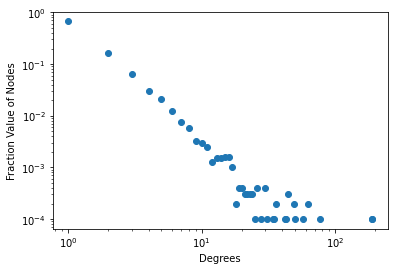

In [25]:
plt.plot(degree_value, histogram, 'o')
plt.xlabel("Degrees")
plt.ylabel("Fraction Value of Nodes")
plt.xscale("log")
plt.yscale('log')
plt.show()

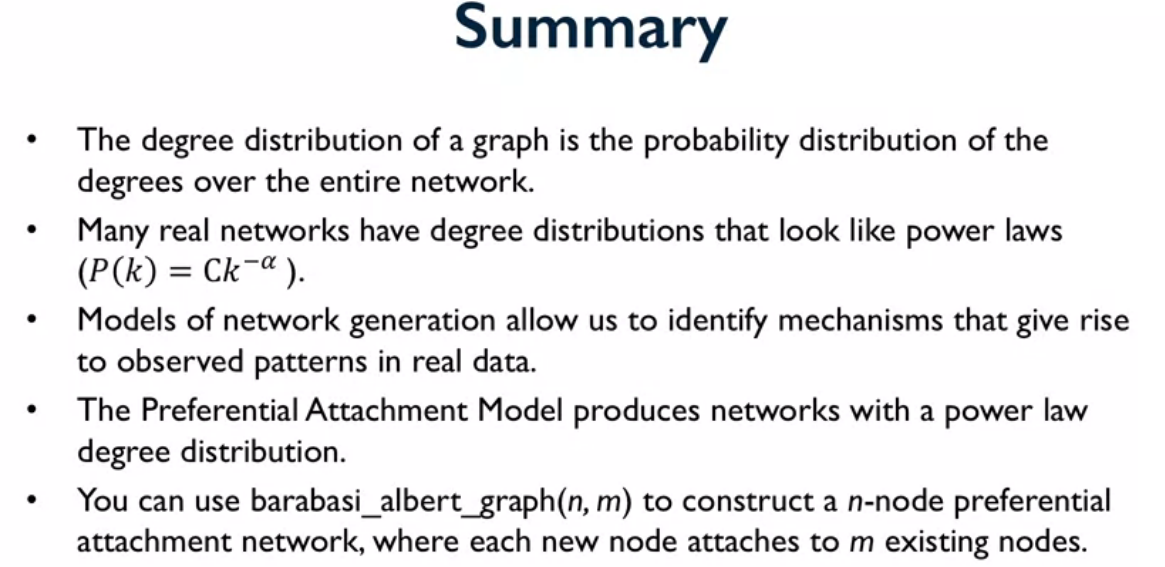

# Avearge Path and Local Clustering Coefficient 

The **local clustering coefficient** indicates how much **nodes in the network are interconnected**, while the **average shortest path** measures how **easily nodes can reach each other**. Small-world networks have high local clustering coefficients and low average shortest paths, while random networks have low local clustering coefficients and high average shortest paths.

In [1]:
import networkx as nx
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
G4 = nx.barabasi_albert_graph(1000, 1) #total no of nodes n and new node attached to number of existing m nodes


In [8]:
#nx.draw_networkx(G4)

In [3]:
#average clustering
nx.average_clustering(G4)

0.0

In [4]:
#average shortest path length

nx.average_shortest_path_length(G4)

6.259773773773774

In [5]:
m = [1,2,3,4,5]

cluster_value = []
shortest_path = []

for i in m:
    G4 = nx.barabasi_albert_graph(1000, i)
    cluster = nx.average_clustering(G4)
    s_path = nx.average_shortest_path_length(G4)
    
    cluster_value.append(cluster)
    shortest_path.append(s_path)

In [6]:
shortest_path

[6.279201201201201,
 4.049151151151151,
 3.4961061061061063,
 3.195983983983984,
 2.989891891891892]

In [7]:
cluster_value

[0.0,
 0.0307951398136969,
 0.028607132294594675,
 0.030613430435973882,
 0.04230291128035281]

In [8]:
data = pd.DataFrame(list(zip(m, cluster_value, shortest_path)),  columns =['m', 'cluster_value', 'shortest_path'])
data

,m,cluster_value,shortest_path
0,1,0.000000,6.279201
1,2,0.030795,4.049151
2,3,0.028607,3.496106
3,4,0.030613,3.195984
4,5,0.042303,2.989892


<AxesSubplot: xlabel='m', ylabel='shortest_path'>

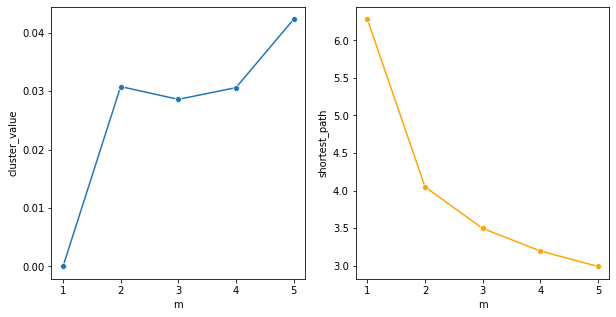

In [9]:
fig, axes = plt.subplots(1, 2, sharex=True, figsize=(10,5))
sns.lineplot(ax = axes[0], data=data, x = 'm',  y = 'cluster_value', marker = 'o')
sns.lineplot(ax = axes[1], data=data, x = 'm',  y = 'shortest_path', marker = 'o', color = 'orange')


In [10]:


dfm = data.melt(id_vars=['m'], value_vars=['cluster_value', 'shortest_path'])
dfm

,m,variable,value
0,1,cluster_value,0.000000
1,2,cluster_value,0.030795
2,3,cluster_value,0.028607
3,4,cluster_value,0.030613
4,5,cluster_value,0.042303
5,1,shortest_path,6.279201
6,2,shortest_path,4.049151
7,3,shortest_path,3.496106
8,4,shortest_path,3.195984
9,5,shortest_path,2.989892


<AxesSubplot: xlabel='m', ylabel='value'>

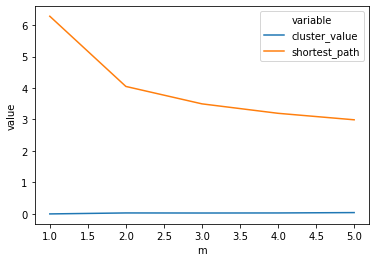

In [11]:
sns.lineplot(data=dfm, x = 'm',  y = 'value', hue = 'variable')

# Small World Model

In [21]:
import networkx as nx
import matplotlib.pyplot as plt

**`watts_strogatz_graph(n, k, p):`** n = number of nodes, k = each nodes connect with k numbers of node, p = random probability value 

In [4]:
G5 = nx.watts_strogatz_graph(1000, 6, 0.04)

In [11]:
degrees = dict(G5.degree())
dict(list(degrees.items())[:10])

{0: 6, 1: 6, 2: 6, 3: 6, 4: 7, 5: 6, 6: 6, 7: 6, 8: 7, 9: 6}

In [14]:
degree_values = sorted(set(degrees.values()))
degree_values

[4, 5, 6, 7, 8]

In [19]:
histogram = [list(degrees.values()).count(i)/float(nx.number_of_nodes(G5)) for i in degree_values]
histogram

[0.003, 0.117, 0.764, 0.109, 0.007]

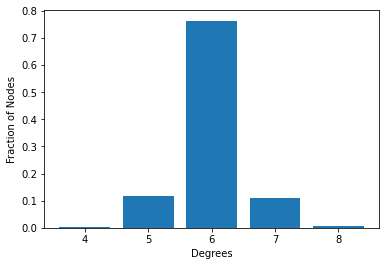

In [22]:
plt.bar(degree_values, histogram)
plt.xlabel("Degrees")
plt.ylabel("Fraction of Nodes")
plt.show()

# Conected Watts Strogatz Graph for Small World Network

**`connected_watts_strogatz_graph(n, k, p, t):`** n = number of nodes, k = each nodes connect with k numbers of node, p = random probability value , t = t times iteration to avoid disconnections

In [32]:
G6 = nx.connected_watts_strogatz_graph(1000, 6, 0.04, 3)

In [33]:
degrees = dict(G6.degree())
dict(list(degrees.items())[:10])

{0: 6, 1: 5, 2: 6, 3: 6, 4: 6, 5: 6, 6: 6, 7: 6, 8: 6, 9: 6}

In [34]:
degree_values = sorted(set(degrees.values()))
degree_values

[4, 5, 6, 7, 8, 9]

In [35]:
histogram = [list(degrees.values()).count(i)/float(nx.number_of_nodes(G6)) for i in degree_values]
histogram

[0.007, 0.105, 0.778, 0.102, 0.007, 0.001]

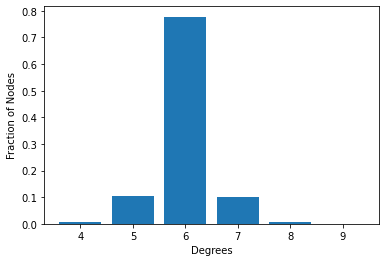

In [36]:
plt.bar(degree_values, histogram)
plt.xlabel("Degrees")
plt.ylabel("Fraction of Nodes")
plt.show()

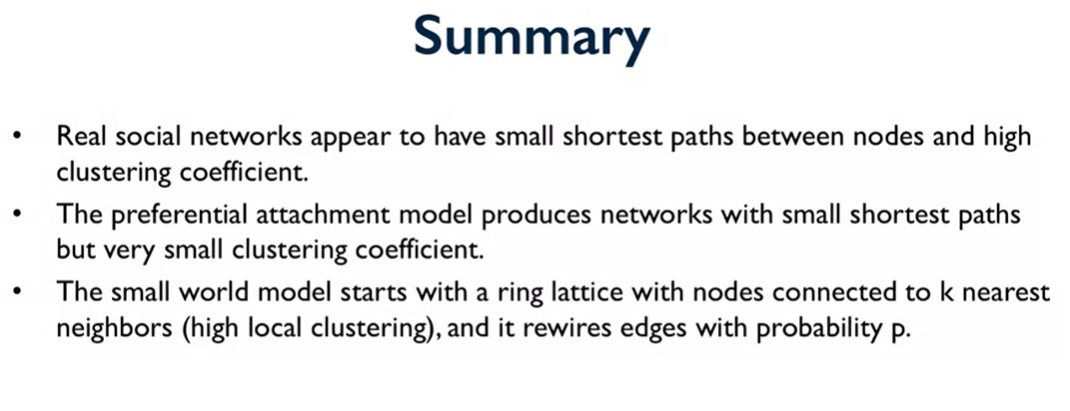

# Network Prediction

Example: Friend Recommandation

**Triadic Closer:** Tedency of people who share connectionsin scoial network to become connected

<h2> Measure I - Common Neighbors </h2>

In [1]:
import networkx as nx

G7 = nx.Graph()
G7.add_edges_from([("A", "B"),
                   ("B", "C"),
                   ("A", "D"),
                   ("D", "C"),
                   ("B", "D"),
                   ("A", "E"),
                   ("E", "F"),
                   ("F", "C"),
                   ("E", "G"),
                   ("G", "F"),
                   ("G", "H"),
                   ("G", "I")])

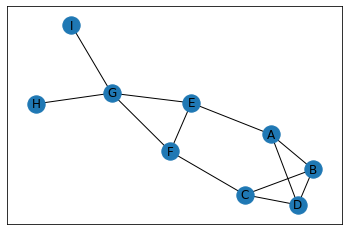

In [2]:
nx.draw_networkx(G7)

creating a list of tuples which have the **two nodes** and the number of **common neighbors** and including the nodes that are **not connected with each other**.

In [13]:
common_neigh = [(e[0], e[1], len(list(nx.common_neighbors(G7, e[0], e[1])))) for e in nx.non_edges(G7)]
common_neigh

[('A', 'G', 1),
 ('A', 'I', 0),
 ('A', 'F', 1),
 ('A', 'H', 0),
 ('A', 'C', 2),
 ('G', 'D', 0),
 ('G', 'C', 1),
 ('G', 'B', 0),
 ('I', 'F', 1),
 ('I', 'D', 0),
 ('I', 'H', 1),
 ('I', 'E', 1),
 ('I', 'B', 0),
 ('I', 'C', 0),
 ('F', 'H', 1),
 ('F', 'D', 1),
 ('F', 'B', 1),
 ('D', 'E', 1),
 ('D', 'H', 0),
 ('H', 'E', 1),
 ('H', 'C', 0),
 ('H', 'B', 0),
 ('E', 'C', 1),
 ('E', 'B', 1)]

# Measure - 2 : Jaccard Coefficient

Number of common neighbors between nodes / total number of neighboring nodes

In [17]:
L = list(nx.jaccard_coefficient(G7))
L

[('A', 'G', 0.16666666666666666),
 ('A', 'I', 0.0),
 ('A', 'F', 0.2),
 ('A', 'H', 0.0),
 ('A', 'C', 0.5),
 ('G', 'D', 0.0),
 ('G', 'C', 0.16666666666666666),
 ('G', 'B', 0.0),
 ('I', 'F', 0.3333333333333333),
 ('I', 'D', 0.0),
 ('I', 'H', 1.0),
 ('I', 'E', 0.3333333333333333),
 ('I', 'B', 0.0),
 ('I', 'C', 0.0),
 ('F', 'H', 0.3333333333333333),
 ('F', 'D', 0.2),
 ('F', 'B', 0.2),
 ('D', 'E', 0.2),
 ('D', 'H', 0.0),
 ('H', 'E', 0.3333333333333333),
 ('H', 'C', 0.0),
 ('H', 'B', 0.0),
 ('E', 'C', 0.2),
 ('E', 'B', 0.2)]

# Measure -3 : Resource Allocation

common neighbors of x and y nodes and summation of fraction of degrees of this common neighbors node

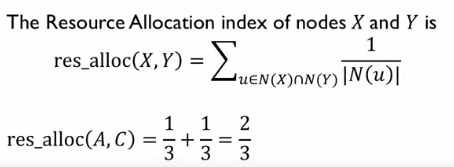

In [2]:
import networkx as nx

In [7]:
res_alloc = list(nx.resource_allocation_index(G7))
res_alloc

[('I', 'A', 0),
 ('I', 'F', 0.25),
 ('I', 'E', 0.25),
 ('I', 'B', 0),
 ('I', 'C', 0),
 ('I', 'D', 0),
 ('I', 'H', 0.25),
 ('A', 'H', 0),
 ('A', 'G', 0.3333333333333333),
 ('A', 'C', 0.6666666666666666),
 ('A', 'F', 0.3333333333333333),
 ('F', 'B', 0.3333333333333333),
 ('F', 'H', 0.25),
 ('F', 'D', 0.3333333333333333),
 ('E', 'H', 0.25),
 ('E', 'B', 0.3333333333333333),
 ('E', 'C', 0.3333333333333333),
 ('E', 'D', 0.3333333333333333),
 ('B', 'G', 0),
 ('B', 'H', 0),
 ('C', 'G', 0.3333333333333333),
 ('C', 'H', 0),
 ('D', 'G', 0),
 ('D', 'H', 0)]

# Measure - 4 : Adamic-Adar Index

common neighbors of x and y nodes and summation of fraction of degrees of this common neighbors node in logarithmic value.

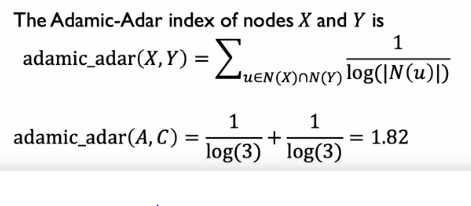

# Measure - 5: Preferential Attachment

Higher degree will get more neighbors

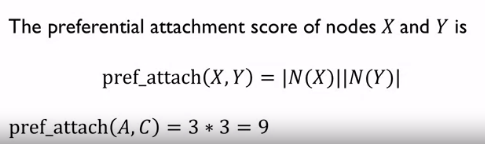

In [5]:
pre_attach = list(nx.preferential_attachment(G7))
pre_attach

[('H', 'F', 3),
 ('H', 'E', 3),
 ('H', 'B', 3),
 ('H', 'A', 3),
 ('H', 'D', 3),
 ('H', 'I', 1),
 ('H', 'C', 3),
 ('F', 'I', 3),
 ('F', 'D', 9),
 ('F', 'A', 9),
 ('F', 'B', 9),
 ('G', 'D', 12),
 ('G', 'C', 12),
 ('G', 'A', 12),
 ('G', 'B', 12),
 ('E', 'I', 3),
 ('E', 'C', 9),
 ('E', 'D', 9),
 ('E', 'B', 9),
 ('B', 'I', 3),
 ('A', 'I', 3),
 ('A', 'C', 9),
 ('D', 'I', 3),
 ('I', 'C', 3)]

# Measure - 6: Community Common Neighbors 

Network consists of different communities. 

Number of common neighbors in a community with a bonus for common nodes

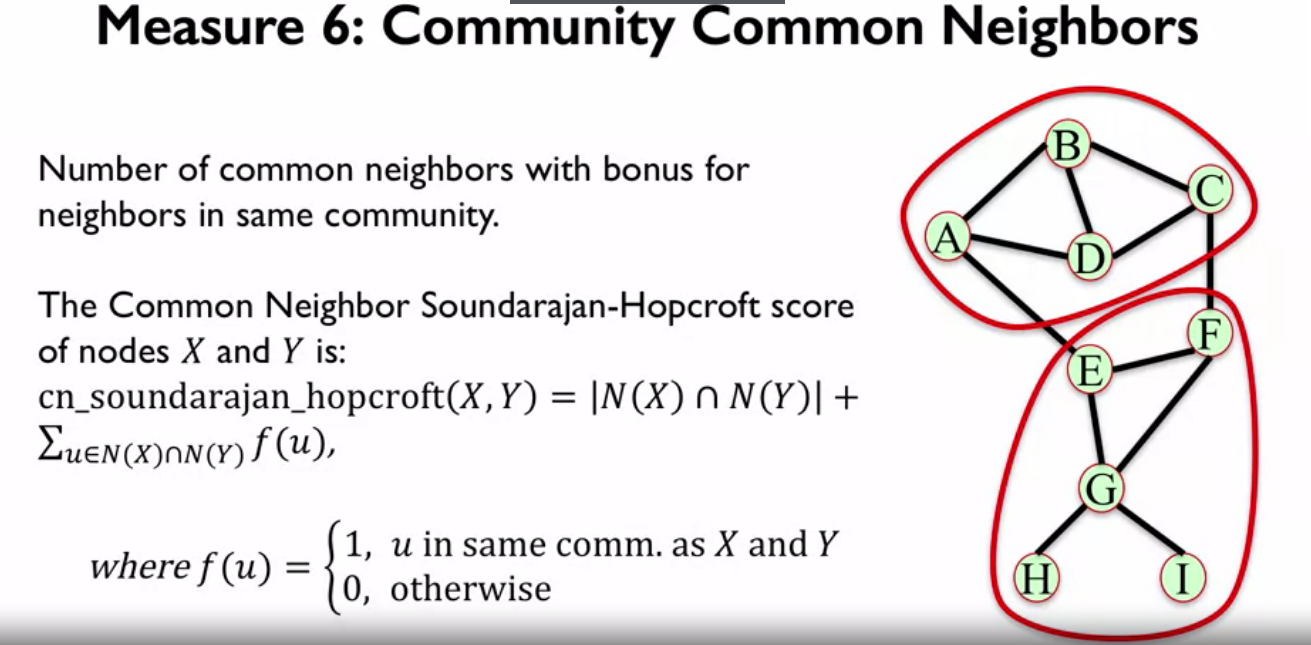

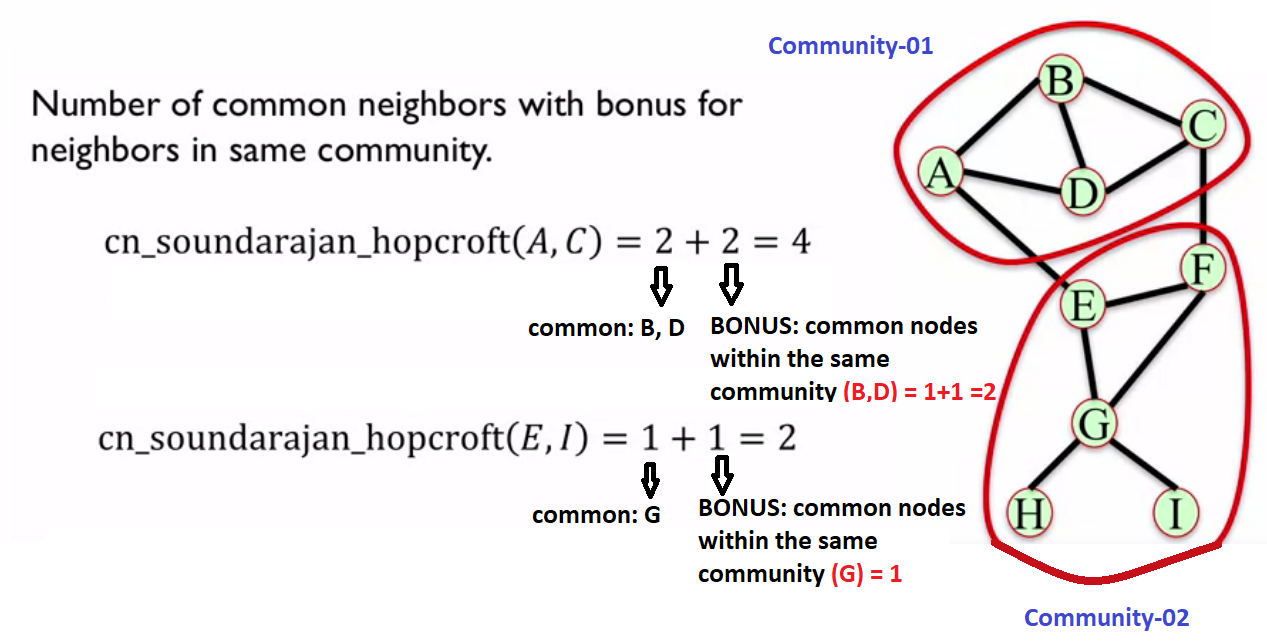

In [10]:
import networkx as nx

G7 = nx.Graph()
G7.add_edges_from([("A", "B"),
                   ("B", "C"),
                   ("A", "D"),
                   ("D", "C"),
                   ("B", "D"),
                   ("A", "E"),
                   ("E", "F"),
                   ("F", "C"),
                   ("E", "G"),
                   ("G", "F"),
                   ("G", "H"),
                   ("G", "I")])

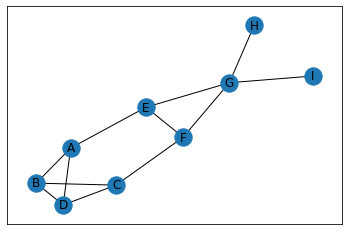

In [11]:
nx.draw_networkx(G7)

# Add Commnity Attributes for nodes

In [12]:
G7.nodes['A']['community'] = 0
G7.nodes['B']['community'] = 0
G7.nodes['C']['community'] = 0
G7.nodes['D']['community'] = 0

G7.nodes['E']['community'] = 1
G7.nodes['F']['community'] = 1
G7.nodes['G']['community'] = 1
G7.nodes['H']['community'] = 1
G7.nodes['I']['community'] = 1

In [9]:
cn = list(nx.cn_soundarajan_hopcroft(G7))

cn

[('C', 'G', 1),
 ('C', 'A', 4),
 ('C', 'I', 0),
 ('C', 'E', 1),
 ('C', 'H', 0),
 ('D', 'G', 0),
 ('D', 'F', 1),
 ('D', 'I', 0),
 ('D', 'E', 1),
 ('D', 'H', 0),
 ('A', 'F', 1),
 ('A', 'G', 1),
 ('A', 'I', 0),
 ('A', 'H', 0),
 ('G', 'B', 0),
 ('F', 'I', 2),
 ('F', 'H', 2),
 ('F', 'B', 1),
 ('I', 'E', 2),
 ('I', 'H', 2),
 ('I', 'B', 0),
 ('B', 'E', 1),
 ('B', 'H', 0),
 ('E', 'H', 2)]

# Measure -7 : Community Resource Allocation

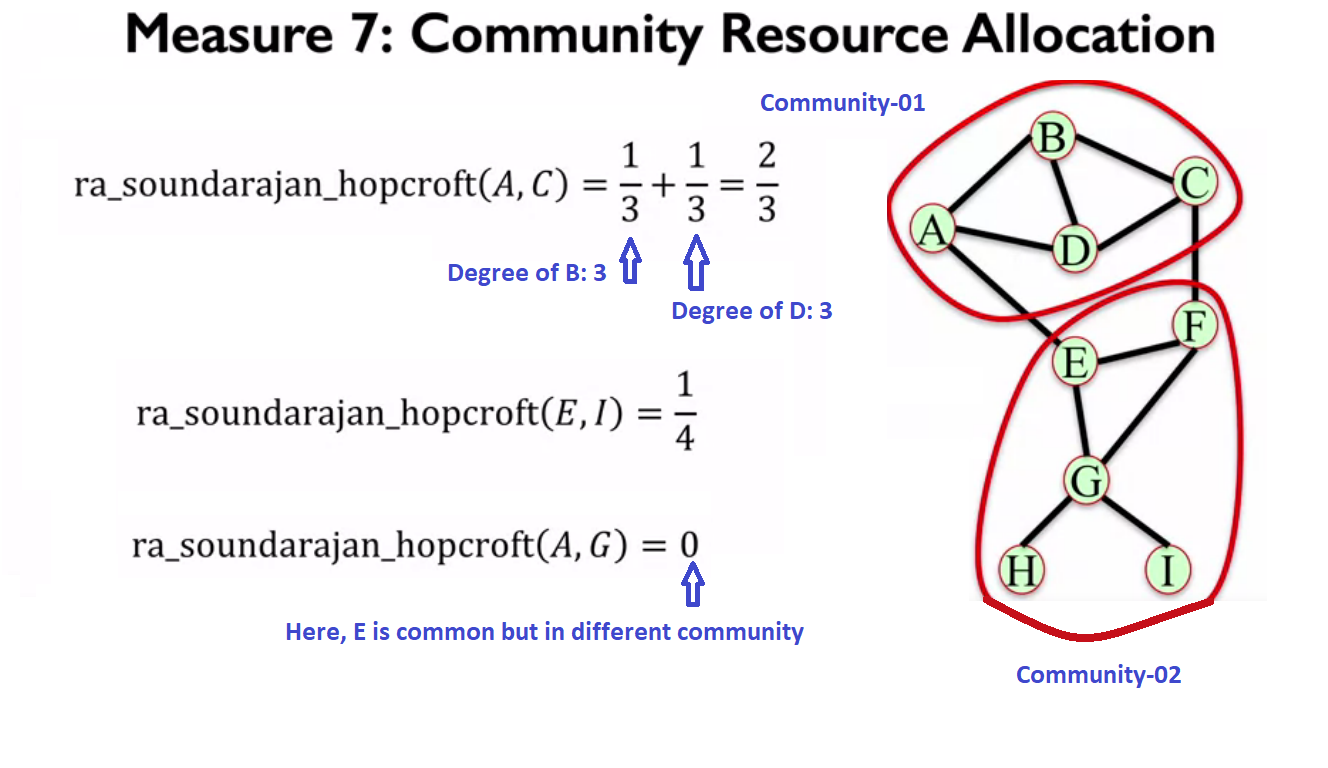

In [15]:
comm_resource = list(nx.ra_index_soundarajan_hopcroft(G7))
comm_resource

[('C', 'G', 0),
 ('C', 'A', 0.6666666666666666),
 ('C', 'I', 0),
 ('C', 'E', 0),
 ('C', 'H', 0),
 ('D', 'G', 0),
 ('D', 'F', 0),
 ('D', 'I', 0),
 ('D', 'E', 0),
 ('D', 'H', 0),
 ('A', 'F', 0),
 ('A', 'G', 0),
 ('A', 'I', 0),
 ('A', 'H', 0),
 ('G', 'B', 0),
 ('F', 'I', 0.25),
 ('F', 'H', 0.25),
 ('F', 'B', 0),
 ('I', 'E', 0.25),
 ('I', 'H', 0.25),
 ('I', 'B', 0),
 ('B', 'E', 0),
 ('B', 'H', 0),
 ('E', 'H', 0.25)]

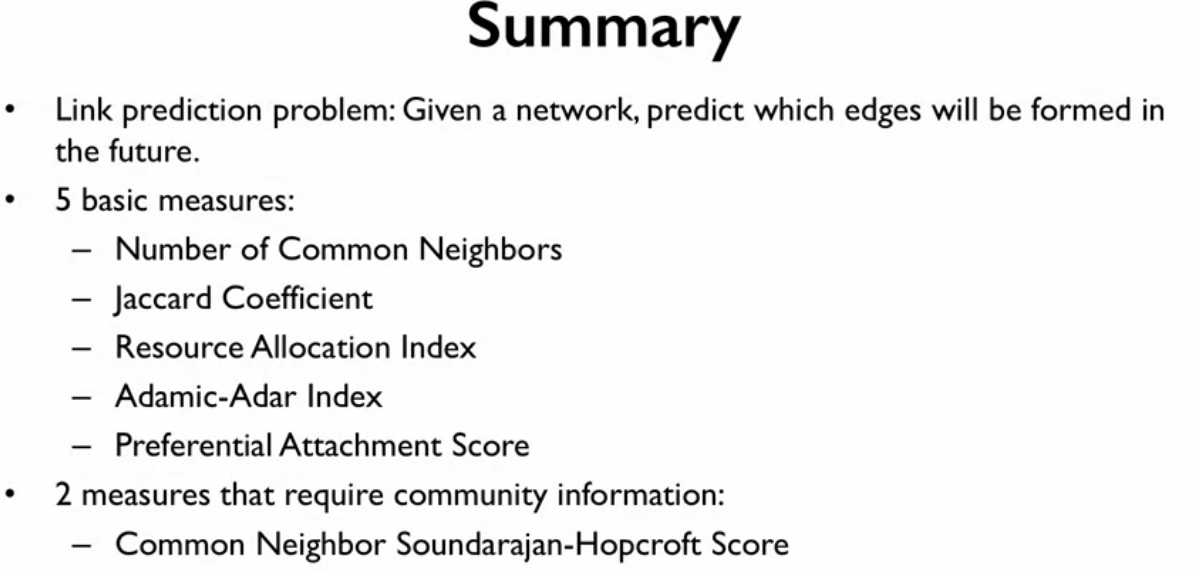